In [2]:


# Remember: comments in python are denoted by the pou_oldd sign
import numpy                       #here we load numpy
from matplotlib import pyplot      #here we load matplotlib
import time, sys                   #and load some utilities

import math

In [3]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

%matplotlib inline

# variable declarations
nx = 81
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

u0 = numpy.empty((ny, nx))
v0 = numpy.empty((ny, nx))

x = numpy.empty(nx)
y = numpy.empty(ny)

for i in range(nx):
    x[i] = i * dx

for j in range(ny):
    y[j] = j * dy

# Initial condition
for i in range(ny):
    for j in range(nx):
        u0[i, j] = 1.
        v0[i, j] = 1.

for i in range(int(.5 / dy),int(1 / dy + 1)):
    for j in range(int(.5 / dx),int(1 / dx + 1)):
        u0[i, j] = 2.
        v0[i, j] = 2.


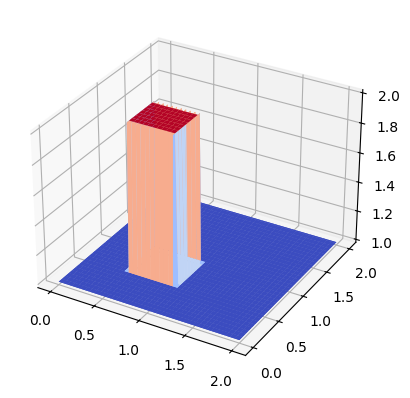

In [4]:
###Plot Initial Condition
##the figsize parameter can be used to produce different sized images
fig, ax = pyplot.subplots(subplot_kw={"projection": "3d"})

X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u0, cmap=cm.coolwarm)
ax.plot_surface(X, Y, v0, cmap=cm.coolwarm)

In [5]:
u = u0 #initialize a temporary array
v = v0

for n in range(nt):  #loop for values of n from 0 to nt, so it will ru_old nt times
    u0 = u.copy() ##copy the existing values of u into u_old
    v0 = v.copy()
    for i in range(1, ny - 1): ## you can try commenting this line and...
        for j in range(1, nx - 1):            
            u[i, j] = u0[i, j] * (1. - ((u0[i, j] - u0[i-1, j]) * (dt/dx))) - v0[i, j] * ((u0[i, j] - u0[i, j-1]) * (dt/dy))
            v[i, j] = v0[i, j] * (1. - ((v0[i, j] - v0[i, j-1]) * (dt/dy))) - u0[i, j] * ((v0[i, j] - v0[i-1, j]) * (dt/dx))

    u[-1, :] = u[0, :] = u[:, -1] = u[:, 0] = 1
    v[-1, :] = v[0, :] = v[:, -1] = v[:, 0] = 1


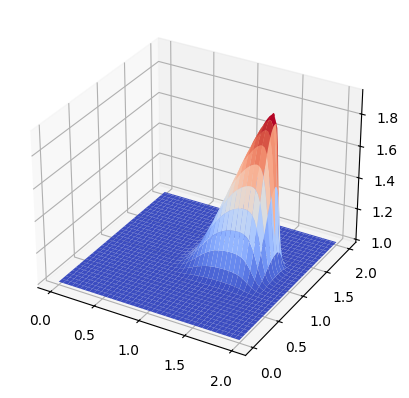

In [6]:
fig, ax = pyplot.subplots(subplot_kw={"projection": "3d"})

X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, cmap=cm.coolwarm)


In [7]:
surf = ax.plot_surface(X, Y, v, cmap=cm.coolwarm)